In [2]:
import pandas as pd

data = pd.read_excel(r"C:\Users\parkh\OneDrive\Desktop\HateSpeech\output0.xlsx")


In [3]:
df = data.copy()

In [4]:
df.isnull().sum()

Post          0
Labels Set    0
dtype: int64

In [5]:
df.head()

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,hate
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,normal
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",normal
3,prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं ...,hate
4,unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स ...,normal


In [6]:
# extract the text and labels
X = list(data['Post'])
y = list(data['Labels Set'])

In [7]:
unique_labels = df['Labels Set'].unique()
label_dict = {label: i for i, label in enumerate(unique_labels)}
num_labels = len(unique_labels)
print("Label mapping:", label_dict)


Label mapping: {'hate': 0, 'normal': 1, 'fake': 2}


In [8]:
import re
def clean_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ''
    
    # Remove newlines
    text = re.sub(r'\n+', ' ', text)
    
    # Remove URLs (http, https, or www links)
    text = re.sub(r'http\S+|www\S+|t\.co\S+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'cleaned_text' column
df['preprocessed_text'] = df['Post'].apply(clean_text)

In [9]:
df['preprocessed_text']

0       मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...
1       सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...
2       सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...
3       prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं ...
4       unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स ...
                              ...                        
8187    सोनू सूद से प्रेरणा लेकर आदिवासियों ने वो किया...
8188    RT ShilpiSinghINC: उमर खालिद पर तो UAPA लगा दि...
8189                              RahulGandhi पप्पू कमीना
8190    मदर टेरेसा ने अपना पूरा जीवन पीड़ितों की सेवा ...
8191    आईपीएल में कोरोना का डर: रैना के हटने के बाद ह...
Name: preprocessed_text, Length: 8192, dtype: object

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import warnings
from nltk.corpus import stopwords

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

In [12]:
from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 

warnings.filterwarnings('ignore')
np.random.seed(0)

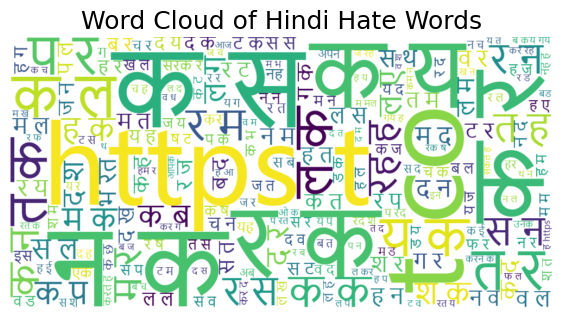

In [60]:
import matplotlib.font_manager as fm

# Use Mangal or Nirmala UI, which support Hindi text
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# Select a Hindi-compatible font
hindi_font = None
for font in font_path:
    if 'Mangal' in font or 'Nirmala' in font:
        hindi_font = font
        break

# If a compatible font is found, use it
if hindi_font:
    wordcloud = WordCloud(
        width=1000, 
        height=500, 
        background_color='white',
        font_path=hindi_font,
        stopwords=hindi_stopwords
    ).generate(text)

    plt.figure(figsize=(7, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Hindi Hate Words", fontsize=18)
    plt.show()
else:
    print("No Hindi-compatible font found.")


In [61]:
example=df['Post'][3]
example

'prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं को यह कहते है की संविधान सबको बराबर अधिकार देता है। सच्चाई यह है कि यह बराबर अधिकार नहीं देता है।'

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 32)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from time import time
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}

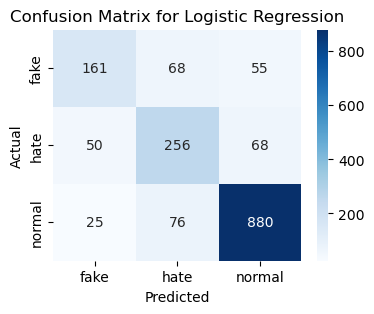

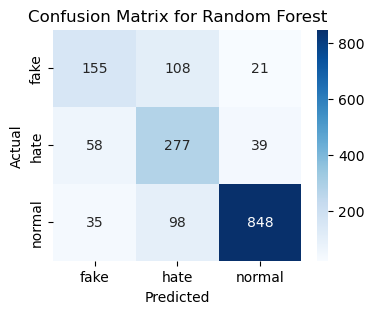

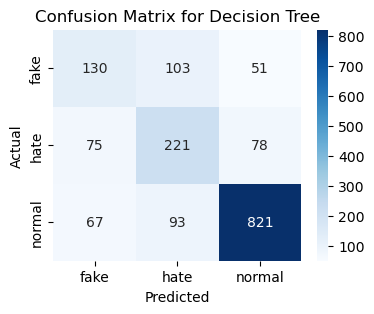

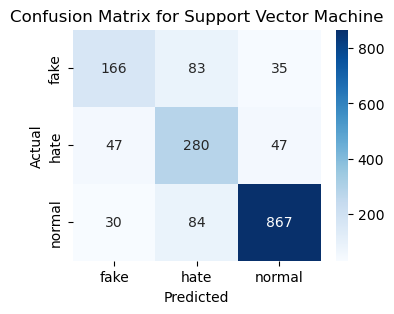

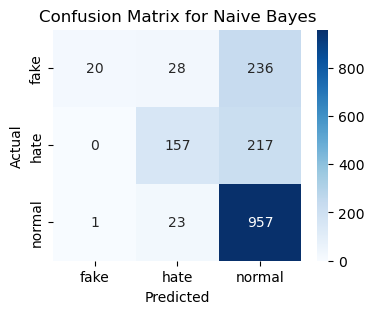

Results for Logistic Regression:
Accuracy: 0.7913361805979255
F1 Score: 0.7892031670172515
Precision: 0.7893860091476638
Recall: 0.7913361805979255
Time Taken: 0.4088578224182129


Results for Random Forest:
Accuracy: 0.7809640024405126
F1 Score: 0.7858623926098913
Precision: 0.798148153929337
Recall: 0.7809640024405126
Time Taken: 11.635187149047852


Results for Decision Tree:
Accuracy: 0.7150701647345943
F1 Score: 0.7174936341989218
Precision: 0.7210108917684542
Recall: 0.7150701647345943
Time Taken: 0.9972922801971436


Results for Support Vector Machine:
Accuracy: 0.801098230628432
F1 Score: 0.8025584336894943
Precision: 0.8081245547866582
Recall: 0.801098230628432
Time Taken: 5.375283479690552


Results for Naive Bayes:
Accuracy: 0.6918852959121415
F1 Score: 0.6249654159038965
Precision: 0.74350331114932
Recall: 0.6918852959121415
Time Taken: 0.03334331512451172




In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from time import time

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time()
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    time_taken = time() - start_time
    
    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix,
        'Time Taken': time_taken
    }
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value}")
    print("\n")


In [67]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Time Taken: {metrics['Time Taken']:.4f} seconds")



Model: Logistic Regression
Accuracy: 0.7913
F1 Score: 0.7892
Confusion Matrix:
[[161  68  55]
 [ 50 256  68]
 [ 25  76 880]]
Time Taken: 0.5671 seconds

Model: Random Forest
Accuracy: 0.7810
F1 Score: 0.7859
Confusion Matrix:
[[155 108  21]
 [ 58 277  39]
 [ 35  98 848]]
Time Taken: 9.9836 seconds

Model: Decision Tree
Accuracy: 0.7151
F1 Score: 0.7175
Confusion Matrix:
[[130 103  51]
 [ 75 221  78]
 [ 67  93 821]]
Time Taken: 0.9680 seconds

Model: Support Vector Machine
Accuracy: 0.8011
F1 Score: 0.8026
Confusion Matrix:
[[166  83  35]
 [ 47 280  47]
 [ 30  84 867]]
Time Taken: 5.3534 seconds

Model: Naive Bayes
Accuracy: 0.6919
F1 Score: 0.6250
Confusion Matrix:
[[ 20  28 236]
 [  0 157 217]
 [  1  23 957]]
Time Taken: 0.0208 seconds


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [16]:
# Tokenization
max_words = 10000  # Maximum vocabulary size
max_len = 150      # Maximum sequence length

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')

# Fit the tokenizer on training text
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Ensure all data is in NumPy format
X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes for verification
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)


X_train shape: (6553, 150)
X_test shape: (1639, 150)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# CNN Model
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# CNN layers
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to numeric values
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform (not fit_transform) to keep consistency

# Convert to float32 (or int32) for model compatibility
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [23]:
# Train the model using the padded sequences
cnn_history = cnn_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
205/205 [==============================] - 10s 44ms/step - loss: -2723.1970 - accuracy: 0.2338 - val_loss: -16461.6855 - val_accuracy: 0.2282
Epoch 2/10
205/205 [==============================] - 10s 47ms/step - loss: -137001.9219 - accuracy: 0.2338 - val_loss: -383933.9688 - val_accuracy: 0.2282
Epoch 3/10
205/205 [==============================] - 9s 45ms/step - loss: -1056596.1250 - accuracy: 0.2338 - val_loss: -2085352.8750 - val_accuracy: 0.2282
Epoch 4/10
205/205 [==============================] - 9s 46ms/step - loss: -3955472.2500 - accuracy: 0.2338 - val_loss: -6579273.5000 - val_accuracy: 0.2282
Epoch 5/10
205/205 [==============================] - 9s 46ms/step - loss: -10456940.0000 - accuracy: 0.2338 - val_loss: -15601230.0000 - val_accuracy: 0.2282
Epoch 6/10
205/205 [==============================] - 9s 42ms/step - loss: -22486842.0000 - accuracy: 0.2338 - val_loss: -31207674.0000 - val_accuracy: 0.2282
Epoch 7/10
205/205 [==============================] - 9s 44

In [24]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")


52/52 [==============================] - 0s 6ms/step - loss: -197759232.0000 - accuracy: 0.2282
CNN Accuracy: 22.82%


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# LSTM Model
lstm_model = Sequential()

# Embedding layer
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
lstm_model.add(LSTM(128, return_sequences=False))

# Fully connected layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
205/205 [==============================] - 34s 159ms/step - loss: -46.5957 - accuracy: 0.2347 - val_loss: -126.2248 - val_accuracy: 0.2282
Epoch 2/10
205/205 [==============================] - 24s 115ms/step - loss: -260.8831 - accuracy: 0.2338 - val_loss: -451.1353 - val_accuracy: 0.2282
Epoch 3/10
205/205 [==============================] - 21s 103ms/step - loss: -673.0632 - accuracy: 0.2338 - val_loss: -975.1423 - val_accuracy: 0.2282
Epoch 4/10
205/205 [==============================] - 21s 104ms/step - loss: -1280.9799 - accuracy: 0.2338 - val_loss: -1693.6119 - val_accuracy: 0.2282
Epoch 5/10
205/205 [==============================] - 21s 103ms/step - loss: -1446.8756 - accuracy: 0.2338 - val_loss: -1710.2933 - val_accuracy: 0.2282
Epoch 6/10
205/205 [==============================] - 21s 104ms/step - loss: -294.8405 - accuracy: 0.2338 - val_loss: -272.1329 - val_accuracy: 0.2282
Epoch 7/10
205/205 [==============================] - 21s 104ms/step - loss: -409.8330 - ac

In [82]:
from tensorflow.keras.layers import Bidirectional

# Bi-LSTM Model
bi_lstm_model = Sequential()

# Embedding layer
bi_lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Fully connected layers
bi_lstm_model.add(Dense(64, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
205/205 [==============================] - 36s 160ms/step - loss: -105.9965 - accuracy: 0.2335 - val_loss: -292.4617 - val_accuracy: 0.2282
Epoch 2/10
205/205 [==============================] - 34s 167ms/step - loss: -607.4528 - accuracy: 0.2338 - val_loss: -1040.0780 - val_accuracy: 0.2282
Epoch 3/10
205/205 [==============================] - 35s 169ms/step - loss: -1564.2937 - accuracy: 0.2338 - val_loss: -2245.0486 - val_accuracy: 0.2282
Epoch 4/10
205/205 [==============================] - 34s 167ms/step - loss: -2885.6421 - accuracy: 0.2338 - val_loss: -3616.8362 - val_accuracy: 0.2282
Epoch 5/10
205/205 [==============================] - 34s 164ms/step - loss: -4328.2046 - accuracy: 0.2338 - val_loss: -5492.0264 - val_accuracy: 0.2282
Epoch 6/10
205/205 [==============================] - 34s 166ms/step - loss: -6861.1934 - accuracy: 0.2341 - val_loss: -7957.4863 - val_accuracy: 0.2282
Epoch 7/10
205/205 [==============================] - 34s 167ms/step - loss: -10017.5

In [19]:
df

,Post,Labels Set,preprocessed_text
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,hate,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,normal,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",normal,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील..."
3,prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं ...,hate,prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं ...
4,unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स ...,normal,unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स ...
...,...,...,...
8187,सोनू सूद से प्रेरणा लेकर आदिवासियों ने वो किया...,normal,सोनू सूद से प्रेरणा लेकर आदिवासियों ने वो किया...
8188,RT ShilpiSinghINC: उमर खालिद पर तो UAPA लगा दि...,hate,RT ShilpiSinghINC: उमर खालिद पर तो UAPA लगा दि...
8189,RahulGandhi पप्पू कमीना,hate,RahulGandhi पप्पू कमीना
8190,मदर टेरेसा ने अपना पूरा जीवन पीड़ितों की सेवा ...,normal,मदर टेरेसा ने अपना पूरा जीवन पीड़ितों की सेवा ...


In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 1. Encode string labels to integers
label_encoder = LabelEncoder()
df['Labels Set'] = label_encoder.fit_transform(df['Labels Set'])

# 2. Now it's safe to convert to categorical
num_classes = len(label_encoder.classes_)
texts = df['Post'].astype(str).values
labels = to_categorical(df['Labels Set'].values, num_classes=num_classes)

# 3. The rest of your pipeline remains the same
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# ...
# Continue with tokenizer, padding, model, training etc. as you wrote


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization parameters
max_words = 10000  # Vocabulary size
max_len = 150      # Max sequence length

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [33]:
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/10
205/205 [==============================] - 21s 93ms/step - loss: -39.9082 - accuracy: 0.2335 - val_loss: -184.1436 - val_accuracy: 0.2282
Epoch 2/10
205/205 [==============================] - 24s 116ms/step - loss: -854.6166 - accuracy: 0.2338 - val_loss: -1963.7985 - val_accuracy: 0.2282
Epoch 3/10
205/205 [==============================] - 24s 118ms/step - loss: -4172.6548 - accuracy: 0.2338 - val_loss: -7056.0635 - val_accuracy: 0.2282
Epoch 4/10
205/205 [==============================] - 21s 103ms/step - loss: -11526.1846 - accuracy: 0.2338 - val_loss: -16811.5586 - val_accuracy: 0.2282
Epoch 5/10
205/205 [==============================] - 20s 97ms/step - loss: -24029.2598 - accuracy: 0.2338 - val_loss: -32135.9180 - val_accuracy: 0.2282
Epoch 6/10
205/205 [==============================] - 19s 91ms/step - loss: -42566.4492 - accuracy: 0.2338 - val_loss: -53992.3281 - val_accuracy: 0.2282
Epoch 7/10
205/205 [==============================] - 20s 98ms/step - loss: -68785.

In [34]:
# Extract final accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")


Final Training Accuracy: 23.38%
Final Validation Accuracy: 22.82%


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

bi_lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=150),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

bi_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train it
bi_lstm_model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))


Epoch 1/5
205/205 [==============================] - 45s 184ms/step - loss: -9.9714 - accuracy: 0.2329 - val_loss: -16.8262 - val_accuracy: 0.2282
Epoch 2/5
205/205 [==============================] - 31s 150ms/step - loss: -23.1800 - accuracy: 0.2338 - val_loss: -30.5300 - val_accuracy: 0.2282
Epoch 3/5
205/205 [==============================] - 39s 191ms/step - loss: -37.3757 - accuracy: 0.2338 - val_loss: -43.6305 - val_accuracy: 0.2282
Epoch 4/5
205/205 [==============================] - 35s 172ms/step - loss: -52.0003 - accuracy: 0.2339 - val_loss: -57.4258 - val_accuracy: 0.2282
Epoch 5/5
205/205 [==============================] - 55s 270ms/step - loss: -68.3887 - accuracy: 0.2367 - val_loss: -72.1961 - val_accuracy: 0.2288


In [41]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities from each model
lstm_preds = lstm_model.predict(X_test_pad)
bi_lstm_preds = bi_lstm_model.predict(X_test_pad)
cnn_preds = cnn_model.predict(X_test_pad)

# Average predictions
avg_preds = (lstm_preds + bi_lstm_preds + cnn_preds) / 3
final_preds = np.round(avg_preds).astype(int)

# Evaluate
print("Ensemble Accuracy:", accuracy_score(y_test, final_preds))


52/52 [==============================] - 1s 12ms/step
Ensemble Accuracy: 0.22818791946308725


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# # 1. Load dataset
# df = pd.read_csv("urdu_tweets_dataset.csv")

# # For multi-class example: assuming 3 classes — update this if you're using binary
# # If it's binary (0,1) then you can skip `to_categorical` and use sigmoid in final layer
# num_classes = len(df['label'].unique())
# texts = df['tweet'].astype(str).values
# labels = to_categorical(df['label'].astype(int).values, num_classes=num_classes)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 3. Tokenization & Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 4. Build Hybrid Model: CNN + LSTM
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# CNN branch
cnn_layer = Conv1D(64, 5, activation='relu')(embedding_layer)
cnn_layer = GlobalMaxPooling1D()(cnn_layer)

# LSTM branch
lstm_layer = LSTM(64)(embedding_layer)

# Merge both branches
merged = concatenate([cnn_layer, lstm_layer])
dense = Dense(64, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
output = Dense(num_classes, activation='softmax')(dropout)

# Compile model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/10
205/205 [==============================] - 14s 58ms/step - loss: 0.6707 - accuracy: 0.6904 - val_loss: 0.5183 - val_accuracy: 0.7877
Epoch 2/10
205/205 [==============================] - 12s 57ms/step - loss: 0.3433 - accuracy: 0.8694 - val_loss: 0.4052 - val_accuracy: 0.8408
Epoch 3/10
205/205 [==============================] - 12s 57ms/step - loss: 0.1376 - accuracy: 0.9582 - val_loss: 0.4639 - val_accuracy: 0.8401
Epoch 4/10
205/205 [==============================] - 11s 54ms/step - loss: 0.0513 - accuracy: 0.9887 - val_loss: 0.5601 - val_accuracy: 0.8408
Epoch 5/10
205/205 [==============================] - 11s 55ms/step - loss: 0.0309 - accuracy: 0.9936 - val_loss: 0.5831 - val_accuracy: 0.8426
Epoch 6/10
205/205 [==============================] - 12s 58ms/step - loss: 0.0222 - accuracy: 0.9953 - val_loss: 0.6368 - val_accuracy: 0.8432
Epoch 7/10
205/205 [==============================] - 15s 73ms/step - loss: 0.0183 - accuracy: 0.9965 - val_loss: 0.6725 - val_accuracy:

In [30]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test_pad)

# Convert one-hot predictions and labels back to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", acc)


52/52 [==============================] - 1s 11ms/step
Test Accuracy: 0.839536302623551


In [31]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


52/52 [==============================] - 1s 13ms/step - loss: 0.7725 - accuracy: 0.8395
Test Accuracy: 83.95%
